 #### In this project we will imagine a telecommunications provider that has segmented its customer base by service usage patterns, categorizing the customers into four groups.If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers.It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total ServiceOur objective is to build a classifier, to predict the class of unknown cases.We will use a specific type of classification: K nearest neighbour.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [35]:
# lets load Data From CSV File as a structred table :
df = pd.read_csv('https://raw.githubusercontent.com/abdellah-0830/free-learner/master/telecommunication-customer.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
# this part will allows us to see how many of each class is in our data set :
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers :

#### we can easily explore our data using visualization techniques:

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

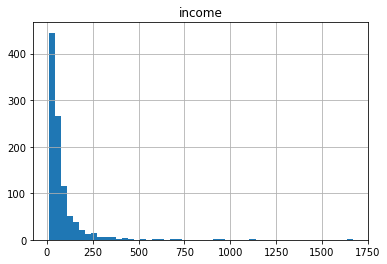

In [11]:
df.hist(column='income', bins=50)

### we need to define feature sets, X :

In [13]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

#### To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array :

In [15]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

#### and now what are our labels? :

In [17]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2], dtype=int64)

#### we found that it is highly recommended to use Data Standardization since it gives data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases :

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577],
       [-0.02696767,  0.2564039 , -0.21382135, -0.9900495 ,  0.54048764,
         0.00434618, -0.54919639,  0.49746728, -0.22207644,  0.96655883,
        -0.927

#### so we can have a high out of-sample accuracy we will use the train/test split technic, This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 11) (700,)
Test set: (300, 11) (300,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

#### TRAINING :
#### Lets start the algorithm with k=4 for now :

In [24]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

#### predicting :
#### we can use the model to predict the test set :

In [26]:
yhat = neigh.predict(X_test)
yhat[0:10]

array([3, 1, 3, 2, 4, 3, 3, 2, 2, 4], dtype=int64)

#### Accuracy evaluation :
#### this function will calculate how closely the actual labels and predicted labels are matched in the test set.

In [28]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5371428571428571
Test set Accuracy:  0.33


#### WHAT ABOUT OTHER K ? :
#### we will start from K=1 and and do the (training-accuracy evalution) process and then start increasing the K and see which K is the best for our model.

In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.28      , 0.27333333, 0.30666667, 0.33      , 0.34      ,
       0.31666667, 0.34      , 0.31666667, 0.32666667])

#### Plot model accuracy for Different number of Neighbors :

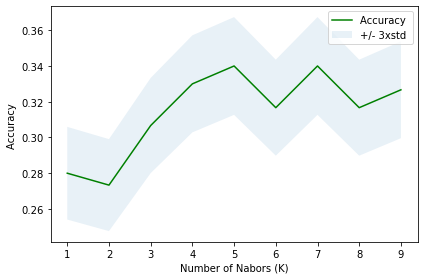

In [32]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [33]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 5


#### in conclusion, K=5 is the K that fits our model the best